# Predicting Bikes Prices
 
 - This project is about predicting Vehicles Prices

 - In this project, we will evaluate the performance and predictive power of a model that has been trained and   tested on data collected on used bikes in india. 

 - The dataset for this project originates from the Kaggle.This dataset contains information about used motorcycles listed on www.bikewale.com.
 - Dataset has a 1061 entries with 7 Features

 - For the purposes of this project, the following preprocessing steps have been made to the dataset:

    - Features ex_showroom_price has a null values and has been removed.



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Reading Data File
bike_df = pd.read_csv('BIKE DETAILS.csv')

#dataset information
print('Columns:',bike_df.shape[1])
print('Rows:',bike_df.shape[0])
print('\nFeatures:',bike_df.columns)

Columns: 7
Rows: 1061

Features: Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


In [2]:
#Printing Dataset
bike_df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [7]:
print('Number of Years:',bike_df['year'].nunique())
print('Years:',bike_df['year'].sort_values(ascending=True).unique())

Number of Years: 28
Years: [1988 1991 1993 1995 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [3]:
#Cheacking Null Values
bike_df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [4]:
#Creating copy datafile for Data operations
df1 = bike_df.copy()
#Droping Null values
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)
print('Drop Null values:',bike_df.shape[0]-df1.shape[0])
print('After Dropping Rows in Dataframe:',df1.shape[0])
df1.head()

Drop Null values: 435
After Dropping Rows in Dataframe: 626


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
2,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
3,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
4,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [5]:
#Adding Current Year Column
df1['Current Year']=2020

#Getting Used Years of Bike
df1['used_yr'] = df1['Current Year'] - df1['year']

df1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,Current Year,used_yr
0,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,2020,2
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,2020,5
2,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0,2020,10
3,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0,2020,2
4,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0,2020,4


In [6]:
diff_prices = df1['ex_showroom_price']- df1['selling_price']

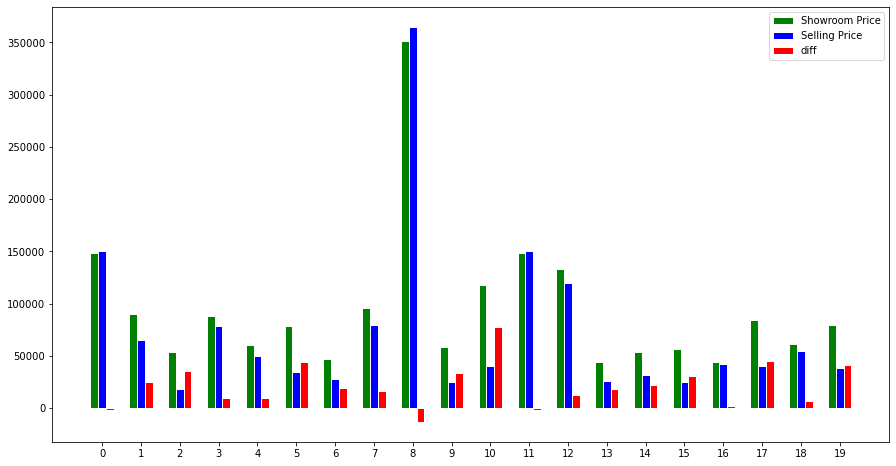

In [7]:
# plotting Showroom Price,Selling Price and difference  
plt.rcParams['figure.figsize'] = 15,8

# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = df1['ex_showroom_price'].head(20)
bars2 = df1['selling_price'].head(20)
bars3 = diff_prices.head(20)
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Showroom Price')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Selling Price')
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='diff')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(bars1))],[n for n in range(0, 20)])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# Handling Categorical values

In [8]:
#Getting Unique values
print('seller Type: ',df1['seller_type'].unique())
print('owner Type:  ',df1['owner'].unique())

seller Type:  ['Individual' 'Dealer']
owner Type:   ['1st owner' '2nd owner' '3rd owner' '4th owner']


In [9]:
#Creating Dictionary for Owner Type
di = {'1st owner':1,'2nd owner':2,'3rd owner':3,'4th owner':4}

#Replacing values
df1['owner'] = df1['owner'].map(di)

df1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,Current Year,used_yr
0,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0,2020,2
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0,2020,5
2,Honda CB Twister,18000,2010,Individual,1,60000,53857.0,2020,10
3,Honda CB Hornet 160R,78500,2018,Individual,1,17000,87719.0,2020,2
4,Bajaj Discover 125,50000,2016,Individual,1,42000,60122.0,2020,4


In [10]:
#Droping non necessary columns
main_df = df1.drop(['name','year','Current Year'],axis=1)

#Converting to one hot encoding
main_df=pd.get_dummies(main_df,drop_first=True)

print('main_df:',main_df.shape)

main_df.head()

main_df: (626, 6)


,selling_price,owner,km_driven,ex_showroom_price,used_yr,seller_type_Individual
0,150000,1,12000,148114.0,2,1
1,65000,1,23000,89643.0,5,1
2,18000,1,60000,53857.0,10,1
3,78500,1,17000,87719.0,2,1
4,50000,1,42000,60122.0,4,1


# Developing a Model

In [11]:
#Getting Dependent and Independent variable
X = main_df.drop(['selling_price'],axis=1)
y = main_df['selling_price']

In [12]:
#Splitting Train and Test Data(spliting 90-10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Linear Regression

In [13]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Creating Model
lr = linear_model.LinearRegression()
#Fitting Model
lr.fit(X_train, y_train)
#Prediction
y_pred = lr.predict(X_test)

In [14]:
#Score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSA:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 16171.130233822838
MSA: 1271819860.683266
R2 Score: 0.9229819159835809


In [15]:
#Comapring Predict and Actual values
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()

,Actual,Predicted
448,45000,49504.503834
486,185000,125002.243245
215,45000,43614.671845
212,35000,52038.148098
481,35000,21666.461242


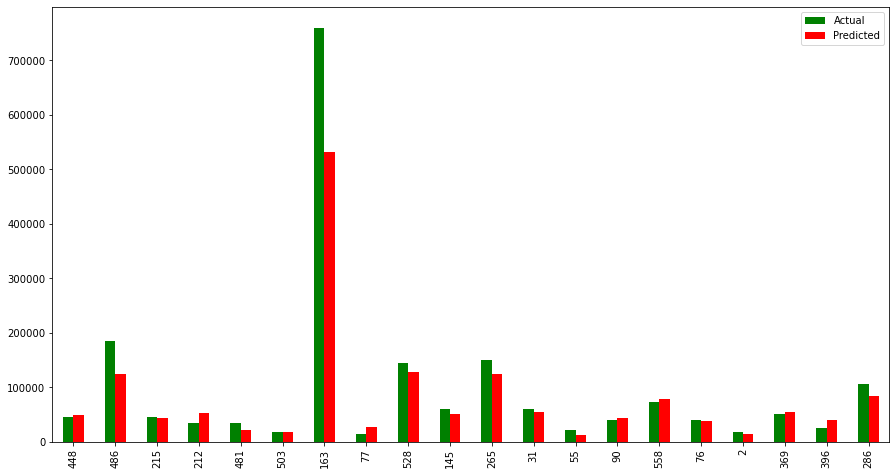

In [16]:
# plotting Predict and actual values
R1 = result[['Actual','Predicted']].head(20)
R1.plot(kind='bar',color={'green','red'})
plt.show()

# Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor

#Creating Model
dt = DecisionTreeRegressor()
#Fitting Model
dt.fit(X_train,y_train)
#Predicting 
y_pred = dt.predict(X_test)

In [18]:
#Score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSA:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 25017.634920634922
MSA: 6002081970.174603
R2 Score: 0.6365296157554934


In [19]:
#Comapring Predict and Actual values
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()

,Actual,Predicted
448,45000,50000.0
486,185000,100000.0
215,45000,27000.0
212,35000,55000.0
481,35000,25000.0


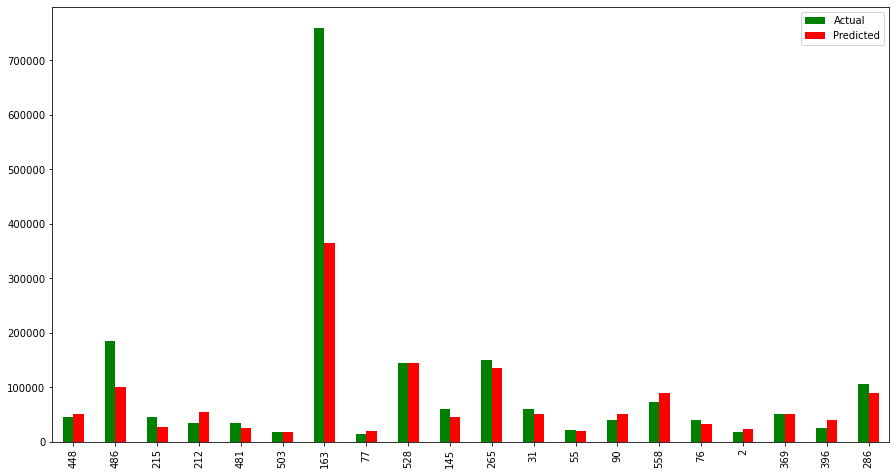

In [20]:
# plotting Predict and actual values
R1 = result[['Actual','Predicted']].head(20)
R1.plot(kind='bar',color={'green','red'})
plt.show()

# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

#Creating Model
rf = RandomForestRegressor()
#Fitting Model
rf.fit(X_train,y_train)
#Predicting 
y_pred = rf.predict(X_test)

In [22]:
#Score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSA:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 22976.274391534393
MSA: 5385199488.623441
R2 Score: 0.6738864052357582


In [23]:
#Comapring Predict and Actual values
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()

,Actual,Predicted
448,45000,46020.00
486,185000,136150.00
215,45000,36420.00
212,35000,53690.00
481,35000,27979.98


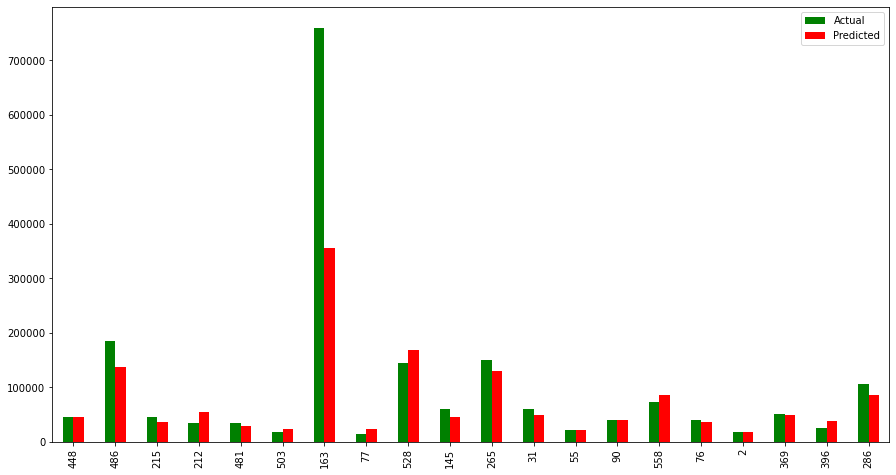

In [24]:
# plotting Predict and actual values
R1 = result[['Actual','Predicted']].head(20)
R1.plot(kind='bar',color={'green','red'})
plt.show()

# XGBRegressor

In [25]:
import xgboost as xgb

#Creating Model
xg_reg = xgb.XGBRegressor(learning_rate =0.01, n_estimators=5580, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective= 'reg:linear',nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006)
#Fitting Model
xg_reg.fit(X_train,y_train)
#Predicting 
y_pred = xg_reg.predict(X_test)

[14:06:33] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
#Score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSA:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

MAE: 22505.6578156002
MSA: 4655576517.578538
R2 Score: 0.7180704638602682


In [27]:
#Comapring Predict and Actual values
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()

,Actual,Predicted
448,45000,41918.242188
486,185000,127247.750000
215,45000,36626.015625
212,35000,79746.554688
481,35000,26385.585938


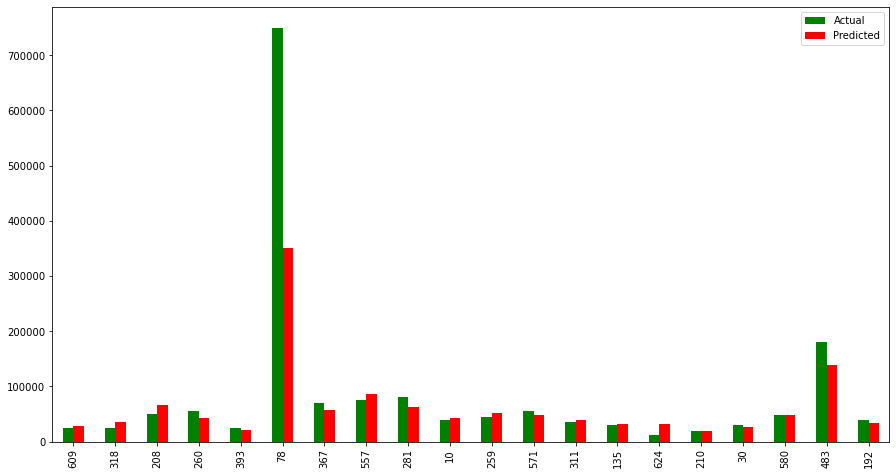

In [28]:
# plotting Predict and actual values
R1 = result[['Actual','Predicted']].tail(20)
R1.plot(kind='bar',color={'green','red'})
plt.show()